### $m\times n$ 행렬의 특이값 분해 (SVD: Singular Value Decomposition)

* $A$가 $m\times n$ 행렬일 때, $m\times m$ 직교행렬 $U$,  $m\times n$ 대각행렬 $\Sigma$, $n\times n$ 직교행렬 $V$에 대해 $A=U\Sigma V^{\rm T}$로 분해하는 것 (단, 대각행렬의 각 성분은 음이 아닌 실수)



* 이때, $\Sigma_{11}\ge \Sigma_{22}\ge \cdots \Sigma_{kk} \ge 0$ (단, $k=\min\{m,n\}$)를 특이값이라고 함



* $A$의 특이값 분해가 $A=U\Sigma V^{\rm T}$일 때, $A^{\rm T}A = V (\Sigma^{\rm T}\Sigma) V^{\rm T}$이므로 $V$의 $i$번째 열벡터 $V_i^C$는 고윳값 $(\Sigma_{ii})^2$에 대응되는 $A^{\rm T}A$의 고유벡터
    
    
    
* $A$의 특이값 분해가 $A=U\Sigma V^{\rm T}$일 때, $AA^{\rm T} = U (\Sigma\Sigma^{\rm T}) U^{\rm T}$이므로 $U$의 $i$번째 열벡터 $U_i^C$는 고윳값 $(\Sigma_{ii})^2$에 대응되는 $AA^{\rm T}$의 고유벡터  
    
    
    
* $A$의 rank가 $r$일 때, 특이값 분해 $A=U\Sigma V^{\rm T}$에서 $U$의 $i$번째 열벡터를 $\mathbf u_i$, $V$의 $i$번째 열벡터를 $\mathbf v_i$, $\Sigma$의 $i$번째 대각성분을 $\sigma_i$라 두면,  $r\le \min\{m,n\}$이고 $A = \sum_{i=1}^r \sigma_i \mathbf u_i \mathbf v_i^{\rm T}$


* $m\times n$ 행렬들로 이루어진 벡터공간 $\mathcal M_{m,n}$에서 내적을 $\langle A,B\rangle = {\rm Tr}(AB^{\rm T})$로 정의할 때, 이 내적으로부터 얻어지는 노름은 $m\times n$ 행렬을 유클리드 내적공간 $\mathbb R^{mn}$의 벡터로 생각하는 것과 마찬가지.

    - 이를 이용하면 이미지 압축을 얻을 수 있음

### Numpy의 linalg 모듈에 svd함수를 이용하면 특이값 분해를 얻을 수 있음

* u, s, vt = np.linalg.svd(A,full_matrices=True, compute_uv=True, hermitian=False)

* 위의 결과에서 u, vt는 rank 2 ndarray, s는 rank1 ndarray. 따라서 (u * s)@ vt = A (또는, np.dot(u*s, vt)가 성립

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
kcha = plt.imread('kcha.png')

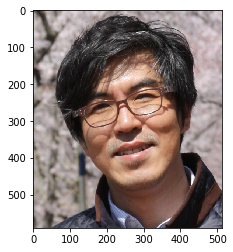

In [4]:
plt.imshow(kcha)

In [5]:
kcha.shape

(591, 513, 3)

In [6]:
kcha2 = np.mean(kcha, axis=2)

In [7]:
kcha2.shape

(591, 513)

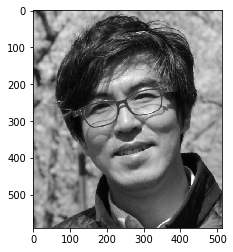

In [8]:
plt.imshow(kcha2, cmap='gray')

In [9]:
u, s, vt = np.linalg.svd(kcha2, full_matrices=False)

In [10]:
u.shape

(591, 513)

In [11]:
vt.shape

(513, 513)

In [12]:
s.shape

(513,)

In [13]:
temp = (u*s)@vt

In [14]:
np.allclose(temp, kcha2)

True

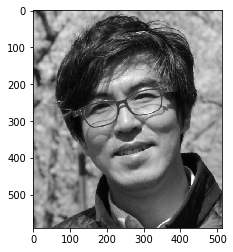

In [15]:
plt.imshow(temp, cmap='gray')

In [16]:
(519+513+1)*100/ (513*591)

0.34071831204256176

### SVD를 이용한 이미지 압축

* $A$의 rank가 $r$일 때, 특이값 분해 $A=U\Sigma V^{\rm T}$에서 $U$의 $i$번째 열벡터를 $\mathbf u_i$, $V$의 $i$번째 열벡터를 $\mathbf v_i$, $\Sigma$의 $i$번째 대각성분을 $\sigma_i$라 두면,  $r\le \min\{m,n\}$이고 $A = \sum_{i=1}^r \sigma_i \mathbf u_i \mathbf v_i^{\rm T}$



* 위의 표현에서 특이값 $\sigma_i$값이 작은 값들을 무시하고 근사시킬 수 있음


In [17]:
np.max(s), np.min(s)

(252.6152, 0.0054842755)

In [18]:
np.sum(s>1)

115

In [19]:
kcha115 = np.dot(u[:,:115]*s[:115], vt[:115])

In [20]:
np.max(kcha2-kcha115)

0.13689673

In [21]:
np.mean(np.abs(kcha2-kcha115))

0.008462631

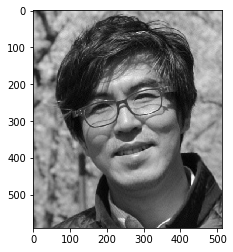

In [22]:
plt.imshow(kcha115, cmap='gray')

In [23]:
def comp_ratio(m,n,k):
    return (1-(m+n+1)*k / (m*n))*100

In [24]:
comp_ratio(591,513, 115)

58.08637027801691

In [25]:
np.sum(s>2)

67

In [26]:
kcha67 = np.dot(u[:,:67]*s[:67], vt[:67])
np.max(kcha2-kcha67)

0.29976955

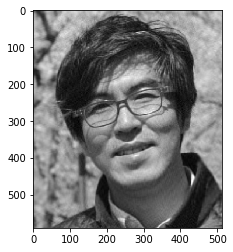

In [27]:
plt.imshow(kcha67, cmap='gray')

In [28]:
comp_ratio(591,513,67)

75.58075485762724

In [29]:
kcha15 = np.dot(u[:,:15]*s[:15], vt[:15])
np.max(kcha2-kcha15)

0.56630105

In [30]:
comp_ratio(591,513,15)

94.53300481887177

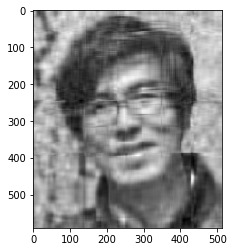

In [31]:
plt.imshow(kcha15, cmap='gray')

### SVD를 이용한 noise 제거

In [32]:
noise = np.random.rand(591,513)

kcha_noise = kcha2+0.3*noise

kcha_noise = (kcha_noise-np.min(kcha_noise))/ (np.max(kcha_noise)-np.min(kcha_noise))

In [33]:
np.max(kcha_noise), np.min(kcha_noise)

(1.0, 0.0)

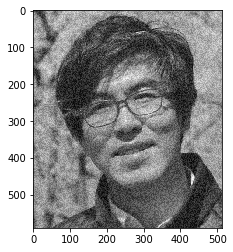

In [34]:
plt.imshow(kcha_noise, cmap='gray')

In [35]:
nu,ns,nvt = np.linalg.svd(kcha_noise, full_matrices=False)

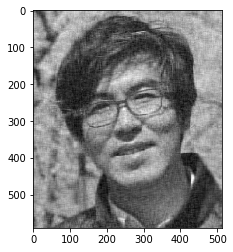

In [36]:
plt.imshow(np.dot(nu[:,:40]*ns[:40], nvt[:40]),cmap='gray')

In [37]:
?np.clip

In [38]:
def img_red(img, n):
    img_r = img[:,:,0]
    img_g = img[:,:,1]
    img_b = img[:,:,2]
    h,w,_ = img.shape
    
    ur,sr,vr = np.linalg.svd(img_r)
    ug,sg,vg = np.linalg.svd(img_g)
    ub,sb,vb = np.linalg.svd(img_b)
    
    rimg = np.dot(ur[:,:n]*sr[:n], vr[:n]).reshape(h,w,1)
    gimg = np.dot(ug[:,:n]*sg[:n], vg[:n]).reshape(h,w,1)
    bimg = np.dot(ub[:,:n]*sb[:n], vb[:n]).reshape(h,w,1)
    
    res_img = np.concatenate((rimg, gimg, bimg), axis=2)
    return res_img.clip(min=0, max=1)

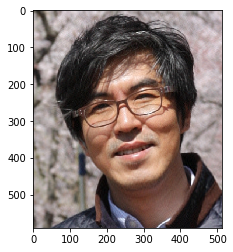

In [39]:
plt.imshow(img_red(kcha,100))

In [40]:
def cr(m,n,k):
    return (m+n+1)*k/(m*n)*100

In [41]:
cr(591,513, 40)

14.578653816341946

## PCA (Principal Component Analysis)


### 평균, 공분산


* $K$가지 특성(확률변수)에 대한 $N$개의 자료를 행벡터 $\mathbf x^{(i)} = (x_1^{(i)},x_2^{(i)},\cdots,x_K^{(i)})$ ($1\le i \le N$)가 주어질 때, 이를 $N\times K$행렬 $X$로 나타냄


* 이때, $k$번째 특성에 대한 평균 $\mu_k = \dfrac 1 N \sum_{i=1}^N x_k^{(i)}$

* 평균벡터(행벡터) $\mathbf \mu = \dfrac 1 N \sum_{i=1}^N \mathbf x^{(i)}$: 


    mu = np.mean(X, axis = 0)

* $k$번째와 $l$번째 특성에 대한 공분산은 $\sigma_{kl} = \dfrac 1 N \sum_{i=1}^N (x_k^{(i)}-\mu_k)(x_{l}^{(i)}-\mu_{l})= \dfrac 1 N
\sum_{i=1}^N (\mathbf x^{(i)}-\mathbf \mu)(\mathbf x^{(i)}-\mathbf \mu)^{\rm T}$

* 공분산 행렬 $C = (\sigma_{kl})$ 계산: 


    np.dot((X-mu).T, X-mu)/len(X)
    np.cov(X, rowvar = False)

In [42]:
N=1000
x0 = 3+10*np.random.randn(N)
x1 = 2 * x0 + 2+5*np.random.randn(N)

X = np.column_stack((x0,x1))

In [43]:
X.shape

(1000, 2)

In [44]:
mu = np.mean(X, axis=0)

In [45]:
mu

array([3.311917  , 9.00175002])

In [46]:
def myCov(X):  # X.shape = (N,K), N: 자료 개수, K: 특성 개수
    N = len(X)
    mu = np.mean(X, axis=0)
    return (np.dot((X-mu).T, (X-mu)))/N

In [47]:
myCov(X)

array([[ 96.29866297, 190.53966493],
       [190.53966493, 402.82958946]])

In [48]:
# Numpy의 공분산 행렬 : np.cov

np.cov(X,rowvar=False)

array([[ 96.39505803, 190.73039533],
       [190.73039533, 403.23282228]])

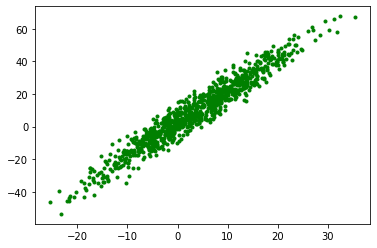

In [49]:
plt.scatter(X[:, 0], X[: , 1], color="green",marker='.')

In [50]:
plt.scatter?

### PCA

* $K$개의 특성을 가진 자료를 $K$차원 행벡터로 이해하자. 주어진 $N$개의 자료의 **평균이 영벡터가 되도록 보정**할 때, $K$차원 벡터공간에서 자료의 흩어짐이 최대가 되는 방향의 단위벡터 $\mathbf v$는?


* 각 자료 벡터를 단위 행벡터 $\mathbf v$ 위에 내린 정사영의 분산이 최대가 되는 $\mathbf v$를 구하면 됨 --> 이 벡터의 방향을 첫번째 주성분 축이라고 하고(first principal axis), 이때의 분산값을 첫번째 주성분 값(first principal value)라고 함 


* $K$개의 특성을 갖는 $N$개의 자료를 $N\times K$ 행렬로 나타낼 때, 각 자료를 단위벡터 $\mathbf v$에 대한 정사영 값을 나타내는  $N\times 1$ 행렬은 $X\mathbf v^{\rm T}$

* 이때, 정사영 내린 값들의 평균은 $\mu = \dfrac 1 N \sum_{i=1}^N \mathbf x^{(i)}\mathbf v^{\rm T}= \mathbf \mu \mathbf v^{\rm T}$

    mu = np.mean(np.dot(X,v))
    
    
* 또, 정사영 내린 값들의 분산은 $\sigma = \dfrac 1 N \sum_{i=1}^N (\mathbf x^{(i)}v^{\rm T}-\mathbf \mu v^{\rm T})^2
=\frac 1 N \mathbf v (X^{\rm T}X)\mathbf v^{\rm T}$ (왜냐하면 $\mathbf \mu \mathbf v^{\rm T}=\mathbf 0$)


* 위 식에서 $X^{\rm T}X$는 양의 준정부호 행렬이므로 분산이 최대가 되는 $\mathbf v$는 $X^{\rm T}X$의 가장 큰 고윳값에 대응되는 고유벡터이다. 같은 이유로 두번째, 세번째 ... 주성분 축은 두번째, 세번째 ... 고윳값에 대응되는 단위 고유벡터.

* 또, $X^{\rm T}X$가 대칭행렬이므로 서로 다른 고윳값에 대응되는 고유벡터는 서로 직교, 즉, 주성분축들은 서로 직교



### SVD를 이용한 PCA

* 위와 같은 조건에서 $N\times K$ 행렬 $X$가 주어질 때, $X$의 특이값 분해가 $X=U\Sigma V^{\rm T}$이면,

$$X^{\rm T}X = V(\Sigma^{\rm T}\Sigma)V^{\rm T}$$

이고, $\Sigma_{11}\ge \Sigma_{22}\ge \cdots$이므로 $V$의 $i$번째 열벡터가 $X$의 $i$번째 주성분축($V$가 직교행렬이므로 $V$의 열벡터들은 단위벡터이고 서로 직교) 

* 이때, $\Sigma_{ii}^2$이 $i$번째 주성분값!!

In [51]:
N=1000
x0 = 3+12*np.random.randn(N)
x1 = 0.5 * x0 + 2+3*np.random.randn(N)

X = np.column_stack((x0,x1))

X_zero = X-np.mean(X, axis=0)
u, s, vt = np.linalg.svd(X_zero,full_matrices=False)

In [52]:
pa1 = vt[0]
pa2 = vt[1]
pv1 = s[0]**2
pv2 = s[1]**2

print(f'first principal value={pv1}, second principal value={pv2}')

first principal value=203016.47771128037, second principal value=7393.236483614145


In [53]:
np.dot(pa1, pa2)

0.0

In [54]:
def draw_line(dir_vec,
              min_x=-30, max_x=40,
              color='magenta'):
    
    line = np.array([dir_vec * v for v in 
                     np.linspace(min_x, max_x, 100)])
    plt.plot(line[:, 0], line[:, 1], color=color)

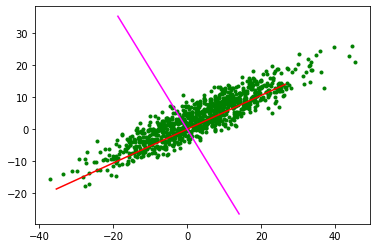

In [55]:
#plt.figure(figsize=(9,7))
plt.scatter(X[:, 0], X[: , 1], color="green", marker='.')
draw_line(pa1,color='red')
draw_line(pa2)

In [56]:
def myPCA(X, verbose=False, num=1):
    X = X - np.mean(X, axis=0)
    _, s, vt = np.linalg.svd(X, full_matrices=False)
    
    if verbose:
        for i in range(num):
            print(f"{i+1}번째 : 주성분축 {vt[i]}, 주성분값 {s[i]**2}\n")
    return vt, s**2

In [57]:
principal_axis, principal_value = myPCA(X, verbose=True, num=2)

1번째 : 주성분축 [-0.8837402  -0.46797785], 주성분값 203016.47771128037

2번째 : 주성분축 [-0.46797785  0.8837402 ], 주성분값 7393.236483614145



## Latent Semantic Analysis (LSA) toy example (SVD 응용)

* 문장의 유사도를 확인하는 방법: 7개 문장에 대한 toy example

    - $d_0$ : Roses are lovely. Nobody hates roses
    - $d_1$ : Gun violence has reached an epidemic proportion in America
    - $d_2$ : The issue of gun violence is really over-hyped. One can find many instances of violence where no guns were involved.
    - $d_3$ : Guns are for violence prone people. Violence begets guns. Guns beget violence.
    - $d_4$ : I like guns but I hate violence. I have never been involved in violence. But I own many guns. Gun violence is incomprehensible to me. I do believe gun owners are the most anti violence people on the planet. He who never uses a gun will be prone to senseless violence.
    - $d_5$ : Guns were used in a armed robbery in San Francisco last night.
    - $d_6$ : Acts of violence usually involve a weapon.
    
* TF (Term Frequency): 각 document에서 특정 term이 나오는 횟수


* IDF (Inverse Document Frequency) : 영어문자에서 'the' 처럼 모든 document에 공통으로 자주 나타나는 term의 무시하기 위해 사용


* Document Feature Vector : 각 document를 정해진 사전에 있는 단어들의 순서를 정해놓고 그 단어의 TF 또는 TF-IDF 값을 성분으로 갖는 벡터로 만드는 것

* 위 문장에 대한 document feature vector의 예

| |violence|gun|america|roses|
|---|---|---|---|---|
|$d_0$|0|0|0|2|
|$d_1$|1|1|1|0|
|$d_2$|2|2|0|0|
|$d_3$|3|3|0|0|
|$d_4$|5|5|0|0|
|$d_5$|0|1|0|0|
|$d_6$|1|0|0|0|


* cosineSimilarity($\vec a, \vec b$)= $\dfrac {\vec a \vec b^{\rm T}}{||\vec a|| ||\vec b||}$ : 위의 두 문장 $d_5$와 $d_6$은 유사도가 높은 문장이지만 consine similarity로는 찾을 수 없음

### LSA 
* 각 문장에 대한 Document Feature Vector를 행벡터로 갖는 행렬 $X$에 대해 SVD $X=U\Sigma V^{\rm T}$를 적용

* 이때, 상대적으로 큰 특이값에 대응되는 주성분 축 k개(즉, $V$의 첫번째 열벡터부터 $k$번째 열벡터)를 선택하면 새로운 topic 벡터로 이해할 수 있다. 예를 들어, 위의 예에서 첫번째 주성분축이 ($a_0,a_1,a_2,a_3$)라면 단위벡터이므로 $\displaystyle{\sum_{i=1}^4 a_i^2 = 1}$이고, 이때 새로운 topic은 violence과 관련된 주제의 비율이 $a_0$, gun과 관련된 비율이 $a_1$, america와 관련된 비율이 $a_2$, roses와 관련된 비율이 $a_3$인 새로운 term으로 이해할 수 있다. 

* 즉, 주어진 벡터의 차원에서 상대적으로 큰 특이값의 개수 $r$로 차원을 낮출 수 있고, 새로운 벡터공간의 기저를 이루는 $V$의 첫번째 부터 $r$번째 열벡터들은 정규직교기저가 됨.

* 이때, 새로운 기저에 대한 DFV의 좌표를 구하고, 이 좌표에 대한 cosine_similarity를 구하는 것을 Latent Semantic Analysis라고 함

In [58]:
def cosine_similarity(vec_1, vec_2):
    return np.dot(vec_1, vec_2) / (np.linalg.norm(vec_1) * np.linalg.norm(vec_2))

In [59]:
terms = ["violence", "gun", "america", "roses"]
termX = np.array([[0, 0, 0, 2], [1, 1, 1, 0], [2, 2, 0, 0], [3, 3, 0, 0], [5, 5, 0, 0], [0, 1, 0, 0], [1, 0, 0, 0]])

cosine_similarity(termX[5],termX[6])

0.0

In [60]:
PA, PV = myPCA(termX)

In [61]:
print(f"Principal values: {PV[0]:.2f}, {PV[1]:.2f}, {PV[2]:.2f}, {PV[3]:.2f}")

Principal values: 38.55, 2.85, 1.00, 0.74


##### 첫번째 특이값과 두 번째 특이값의 차이가 크므로 1차원 공간으로 dimension reduction 

##### 한 개의 topic v

In [62]:
v = PA[0]

##### term과 topic사이의 관련성

In [63]:
term_topic_affinity = list(zip(terms, v))
print(term_topic_affinity)

[('violence', 0.7002556148451347), ('gun', 0.7002556148451345), ('america', -0.02550417227228189), ('roses', -0.13650525613481176)]


##### 각 DFV $\mathbf x$의 topic $\mathbf v$에 대한 좌표 : $\mathbf x \mathbf v^{\rm T} $

In [64]:
termX = termX - np.mean(termX, axis=0)
topicX = np.dot(termX, v.T)

In [65]:
topicX

array([-2.63124195, -0.98322438,  0.44279102,  1.84330225,  4.64432471,
       -1.65797582, -1.65797582])

In [66]:
cosine_similarity(topicX[5], topicX[6])

1.0